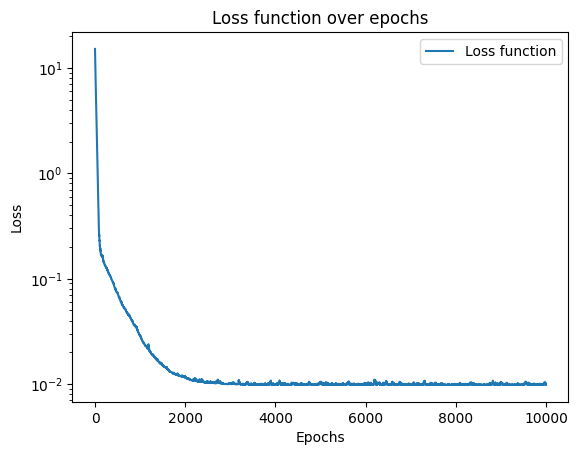


Giá trị gần tối ưu: a = 0.9968, b = 2.0055


In [115]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

def TwoXplus1_data(sample_size):
    x = np.random.rand(sample_size, 1)
    y = 2 * x + 1 + np.random.randn(sample_size, 1) * 0.1
    return x, y

def compute_gradient(x, y, a, b):
    grad_a = -2 * (y - (a + b * x))
    grad_b = -2 * x * (y - (a + b * x))
    return grad_a, grad_b

def stochastic_gradient_descent(x, y, learning_rate, x_t, max_iterations, tol):
    x_t1= x_t
    loss = []
    m = len(x)
    for epoch in range(max_iterations):
        idx = random.randint(0, m - 1)
        grad_a, grad_b = compute_gradient(x[idx], y[idx], x_t[0], x_t[1])
        x_t1[0] = x_t[0] - learning_rate * grad_a
        x_t1[1] = x_t[1] - learning_rate * grad_b
        loss.append(np.sum((y - (x_t[0] + x_t[1] * x))**2) / m)
        if np.linalg.norm([grad_a, grad_b]) < tol:
            print(f"Đã hội tụ sau {epoch + 1} vòng lặp.")
            break
        x_t = x_t1
        epoch += 1

    # Vẽ đồ thị loss
    plt.plot(loss, label='Loss function')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss function over epochs')
    plt.yscale('log')
    plt.legend()
    plt.show()

    return x_t1

# Chạy thử
x, y = TwoXplus1_data(1000)
a, b = stochastic_gradient_descent(x, y, learning_rate=0.01, x_t=[5, 2], max_iterations=10000, tol=1e-6)
print(f"\nGiá trị gần tối ưu: a = {a.item():.4f}, b = {b.item():.4f}")

In [116]:
df = pd.read_csv('Salary_Data.csv')
display(df)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


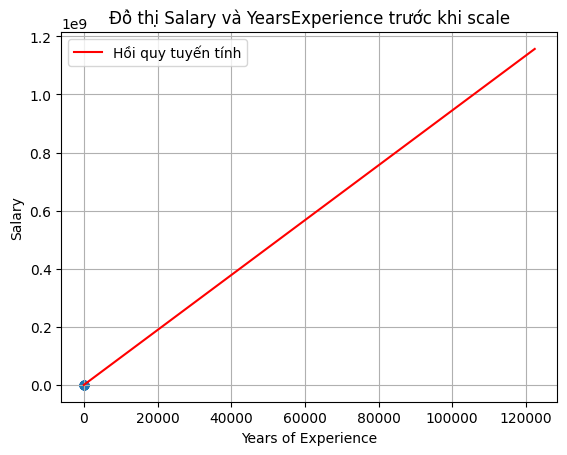

In [117]:
# plot đồ thị
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = df[["YearsExperience"]]
y = df["Salary"]

# Hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Đồ thị Salary và YearsExperience trước khi scale')
x = np.linspace(X.min(), y.max(), 100).reshape(-1, 1)
y = model.predict(x)
plt.plot(x, y, color='red', label='Hồi quy tuyến tính')
plt.legend()
plt.grid()
plt.show()

In [118]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['YearsExperience', 'Salary']] = scaler.fit_transform(df[['YearsExperience', 'Salary']])
display(df)

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514
5,0.191489,0.223376
6,0.202128,0.264812
7,0.223404,0.197425
8,0.223404,0.315545
9,0.276596,0.229837


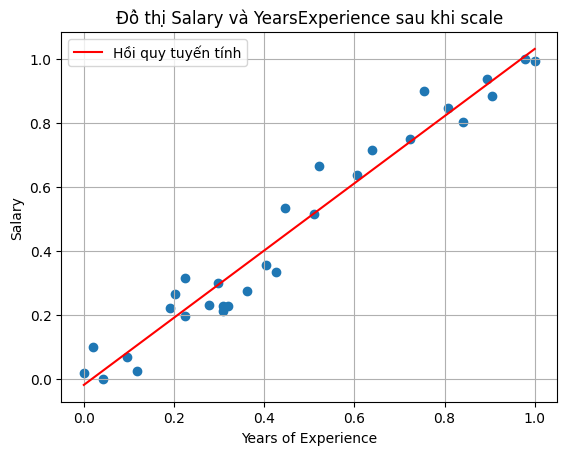

In [119]:
X = df[["YearsExperience"]]
y = df["Salary"]

# Hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Đồ thị Salary và YearsExperience sau khi scale')
x = np.linspace(X.min(), y.max(), 100).reshape(-1, 1)
y = model.predict(x)
plt.plot(x, y, color='red', label='Hồi quy tuyến tính')
plt.legend()
plt.grid()
plt.show()

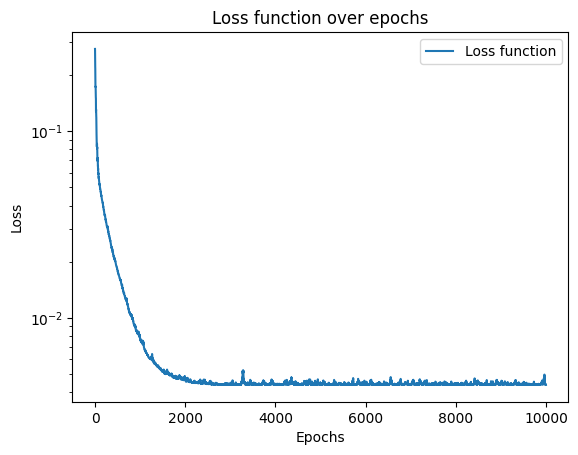

Giá trị x[0] = -0.0231, x[1] = 1.0580


In [120]:
result = stochastic_gradient_descent(df['YearsExperience'].values, df['Salary'].values, learning_rate=0.01, x_t=[0, 0], max_iterations=10000, tol=1e-6)
print(f"Giá trị x[0] = {result[0]:.4f}, x[1] = {result[1]:.4f}")

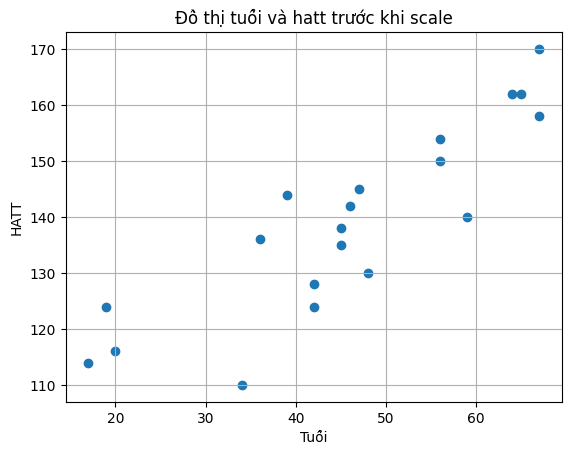

In [121]:
df1 = pd.read_csv('tuoi_hatt.csv')
plt.scatter(df1['Tuổi'], df1['HATT'])
plt.xlabel('Tuổi')
plt.ylabel('HATT')
plt.title('Đồ thị tuổi và hatt trước khi scale')
plt.grid()
plt.show()

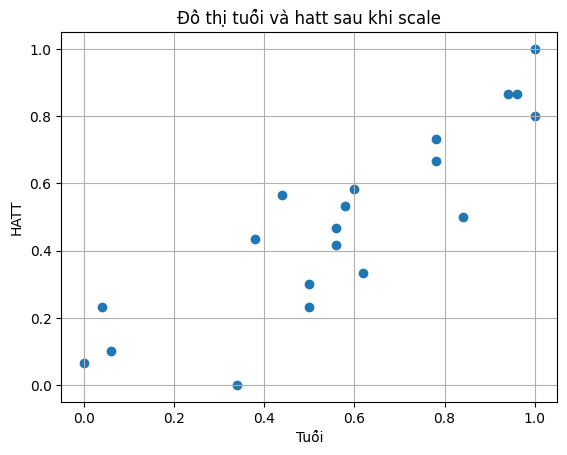

In [122]:
scaler = MinMaxScaler()
df1[['Tuổi', 'HATT']] = scaler.fit_transform(df1[['Tuổi', 'HATT']])
plt.scatter(df1['Tuổi'], df1['HATT'])
plt.xlabel('Tuổi')
plt.ylabel('HATT')
plt.title('Đồ thị tuổi và hatt sau khi scale')
plt.grid()
plt.show()

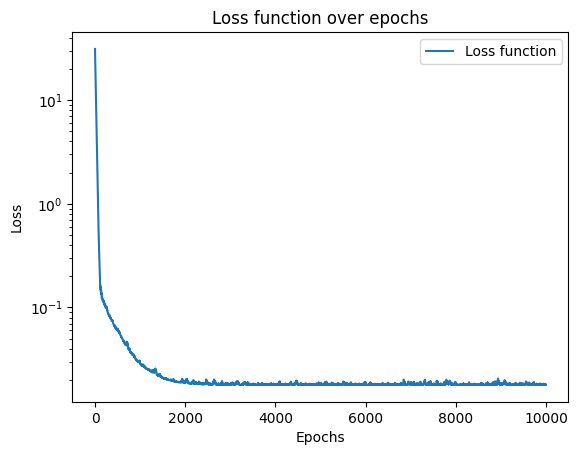

Giá trị x[0] = 0.013906467120360387, x[1] = 0.797566332398861


In [123]:
tuoi, hatt = stochastic_gradient_descent(df1['Tuổi'].values, df1['HATT'].values, learning_rate=0.01, x_t=[5, 2], max_iterations=10000, tol=1e-6)
print(f"Giá trị x[0] = {tuoi}, x[1] = {hatt}")

# Accelerated Gradient Descent

Đã hội tụ sau 6039 vòng lặp.


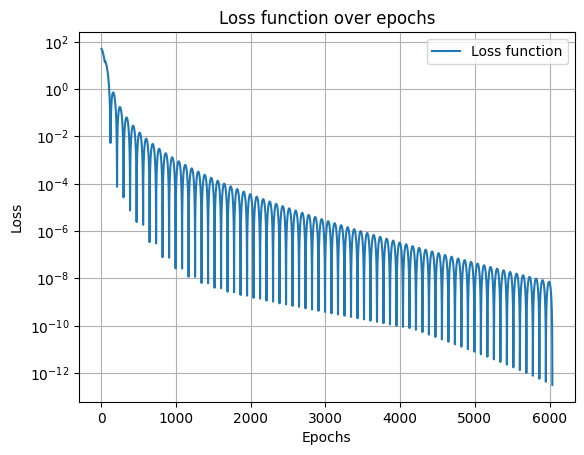


Giá trị gần tối ưu: x = [-2.99999918 -1.99999573]


In [124]:
def f(x, y):
    return (x**2 + y - 7)**2 + (x - y + 1)**2

def gradient(x, y):
    grad_x = 4 * x * (x**2 + y - 7) + 2 * (x - y + 1)
    grad_y = 2 * (x**2 + y - 7) - 2 * (x - y + 1)
    return np.array([grad_x, grad_y])

def accelerated_gradient_descent(f, learning_rate, x_t, max_iterations, tol):
    current_point = np.array(x_t, dtype=float)
    previous_point = np.array(x_t, dtype=float)
    loss = []
    for i in range(1, max_iterations + 1):
        y_i = current_point + (i - 1) / (i + 2) * (current_point - previous_point)
        grad = gradient(y_i[0], y_i[1])
        next_point = y_i - learning_rate * grad
        current_loss = f(next_point[0], next_point[1])
        loss.append(current_loss)
        if np.linalg.norm(grad) < tol:
            print(f"Đã hội tụ sau {i} vòng lặp.")
            break

        previous_point = current_point
        current_point = next_point

    # Vẽ đồ thị hàm mất mát
    plt.plot(loss, label='Loss function')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss function over epochs')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()

    return current_point

# Gọi hàm chính
x = accelerated_gradient_descent(f, learning_rate=0.001, x_t=[0, 0], max_iterations=10000, tol=1e-6)
print(f"\nGiá trị gần tối ưu: x = {x}")
